In [1]:
%matplotlib inline

## Random Forests: [Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) and [Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- Each tree is built from a bootstrap (ie, with replacement) sample from the training dataset.
- Returns averaged prediction of a set of classifiers, which should decrease the estimator variance.
- Like decision trees, random forests also can handle multi-output problems.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, 
                           n_features=4,
                           n_informative=2, 
                           n_redundant=0,
                           random_state=0, 
                           shuffle=False)

clf = RandomForestClassifier(max_depth=2, 
                             random_state=0)
clf.fit(X, y)
print(clf.predict([[0, 0, 0, 0]]))

[1]


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, 
                       n_informative=2,
                       random_state=0, 
                       shuffle=False)

regr = RandomForestRegressor(max_depth=2, 
                             random_state=0)
regr.fit(X, y)
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


## Extremely Randomized Trees: [Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier) and [Regressors](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html#sklearn.ensemble.ExtraTreesRegressor)
- Random subsets of candidate features are used (as in RFs) - instead of looking for the most discriminative thresholds, *thresholds are picked at random for each feature. The best ones are picked as splitting rules.*
- Slightly better variance, slight increase in bias.
- Parameters:
    - ```n_estimators``` (number of trees in forest), ```max_features``` (size of random feature subsets, used when splitting nodes)
    - empirical "good" values: ```max_features=None``` (always considering all features instead of random subset) for regressions, ```max_features="sqrt"``` for classifications.
    - Best params should always be cross-validated.
- Parallelization:
    - controlled by ```n_jobs``` (one per machine core). Uses all available cores if ```n_jobs=-1```.    

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, 
                  n_features=10, 
                  centers=100,
                  random_state=0)

clf = DecisionTreeClassifier(
    max_depth=None, 
    min_samples_split=2,
    random_state=0)

scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = RandomForestClassifier(
    n_estimators=10, 
    max_depth=None,
    min_samples_split=2, 
    random_state=0)

scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean())

clf = ExtraTreesClassifier(
    n_estimators=10, 
    max_depth=None,
    min_samples_split=2, 
    random_state=0)

scores = cross_val_score(clf, X, y, cv=5)
print(scores.mean() > 0.999)

0.9823000000000001
0.9997
True


## Example: Plot decision surfaces, iris dataset, 4 classifiers
- 1) std decision tree
- 2) random forest
- 3) extra trees
- 4) Adaboost

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (RandomForestClassifier, 
                              ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

In [6]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(
              max_depth = None),
          RandomForestClassifier(
              n_estimators = n_estimators),
          ExtraTreesClassifier(
              n_estimators = n_estimators),
          AdaBoostClassifier(
              DecisionTreeClassifier(
                  max_depth=3),
                  n_estimators = n_estimators)]

DecisionTree with features [0, 1] has a score of 0.9266666666666666
RandomForest with 30 estimators with features [0, 1] has a score of 0.9266666666666666
ExtraTrees with 30 estimators with features [0, 1] has a score of 0.9266666666666666
AdaBoost with 30 estimators with features [0, 1] has a score of 0.8533333333333334
DecisionTree with features [0, 2] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [0, 2] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [0, 2] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [0, 2] has a score of 0.9933333333333333
DecisionTree with features [2, 3] has a score of 0.9933333333333333
RandomForest with 30 estimators with features [2, 3] has a score of 0.9933333333333333
ExtraTrees with 30 estimators with features [2, 3] has a score of 0.9933333333333333
AdaBoost with 30 estimators with features [2, 3] has a score of 0.9933333333333333


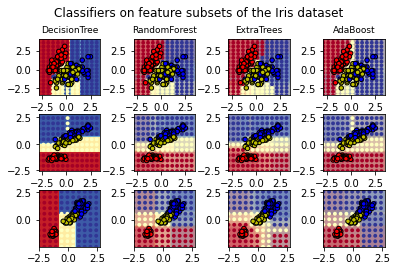

In [7]:
for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize=9)

        # plot decision boundary using mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

## Example: Find pixel importances with parallel random forest
- pixel importance metric: impurity-based.
- the hotter the pixel, the more important.

In [8]:
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.ensemble import ExtraTreesClassifier

n_jobs = 1
data   = fetch_olivetti_faces()
X, y   = data.data, data.target
mask   = y < 5  # Limit to 5 classes
X      = X[mask]
y      = y[mask]

Fitting ExtraTreesClassifier on faces data with 1 cores...
done in 1.12s


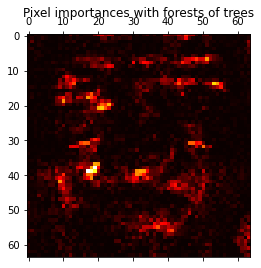

In [9]:
# Build a forest and compute the pixel importances
print("Fitting ExtraTreesClassifier on faces data with %d cores..." % n_jobs)
t0 = time()
forest = ExtraTreesClassifier(n_estimators=1000,
                              max_features=128,
                              n_jobs=n_jobs,
                              random_state=0)

forest.fit(X, y)
print("done in %0.2fs" % (time() - t0))
importances = forest.feature_importances_
importances = importances.reshape(data.images[0].shape)

plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

## [Random Tree Embedding](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomTreesEmbedding.html#sklearn.ensemble.RandomTreesEmbedding)
- Performs unsupervised data transform
- Encodes data by indices of the leaves where the data resides, leading to a sparse high-D representation - can be computed very efficiently.
- Given that neighboring data points are likely to be in the same leaf, this tranform implicitly performs density estimation.

## Example: Hashing Feature Transforms using Totally Random Trees.
- Neighboring points often share the leaf on a tree - therefore large parts of their hashed representation.
- This helps to separate two concentric circles using principal components of their transformed data.
- High-D spaces: linear classifiers often are a good choice; BernoulliNB is a particularly good option for sparse binary data.
- Bottom row: comparison of decision boundary, BernoulliNB (transformed space) vs ExtraTreesClassifier (original data)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB

In [11]:
X, y = make_circles(factor=0.5, random_state=0, noise=0.05)

hasher = RandomTreesEmbedding(n_estimators=10, 
                              random_state=0, 
                              max_depth=3)
X_transformed = hasher.fit_transform(X)

# dimensionality reduction using truncated SVD
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_transformed)

# Learn a Naive Bayes classifier on the transformed data
nb = BernoulliNB()
nb.fit(X_transformed, y)

# Learn an ExtraTreesClassifier for comparison
trees = ExtraTreesClassifier(
    max_depth=3, 
    n_estimators=10, 
    random_state=0)
trees.fit(X, y)

ExtraTreesClassifier(max_depth=3, n_estimators=10, random_state=0)

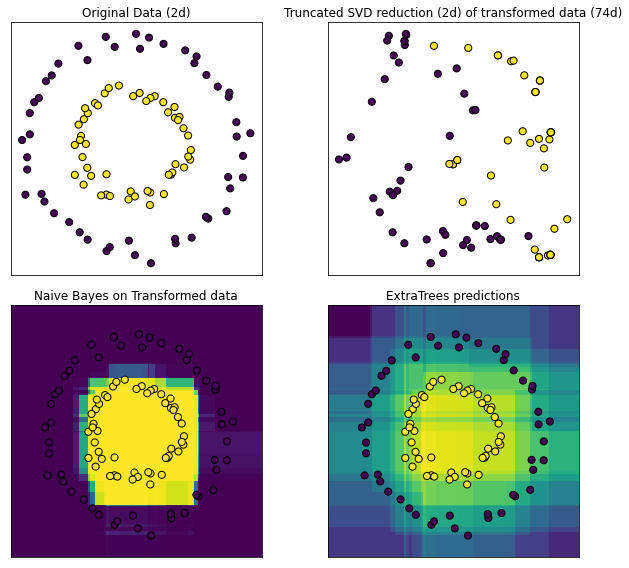

In [12]:
# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8))

ax = plt.subplot(221)
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Original Data (2d)")
ax.set_xticks(())
ax.set_yticks(())

ax = plt.subplot(222)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=50, edgecolor='k')
ax.set_title("Truncated SVD reduction (2d) of transformed data (%dd)" %
             X_transformed.shape[1])
ax.set_xticks(())
ax.set_yticks(())

# Plot the decision in original space. For that, we will assign a color
# to each point in the mesh [x_min, x_max]x[y_min, y_max].
h = .01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# transform grid using RandomTreesEmbedding
transformed_grid = hasher.transform(np.c_[xx.ravel(), yy.ravel()])
y_grid_pred = nb.predict_proba(transformed_grid)[:, 1]

ax = plt.subplot(223)
ax.set_title("Naive Bayes on Transformed data")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

# transform grid using ExtraTreesClassifier
y_grid_pred = trees.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

ax = plt.subplot(224)
ax.set_title("ExtraTrees predictions")
ax.pcolormesh(xx, yy, y_grid_pred.reshape(xx.shape))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
ax.set_ylim(-1.4, 1.4)
ax.set_xlim(-1.4, 1.4)
ax.set_xticks(())
ax.set_yticks(())

plt.tight_layout()
plt.show()